<h1><strong>Telecom Customer Churn Prediction</strong></h1>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel('C:/Users/vansh/OneDrive/Documents/Customer_data.xlsx')

In [26]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [59]:
#indentifying and handling null values and outliers.

In [29]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [31]:
df['TotalCharges'].isnull().sum()

0

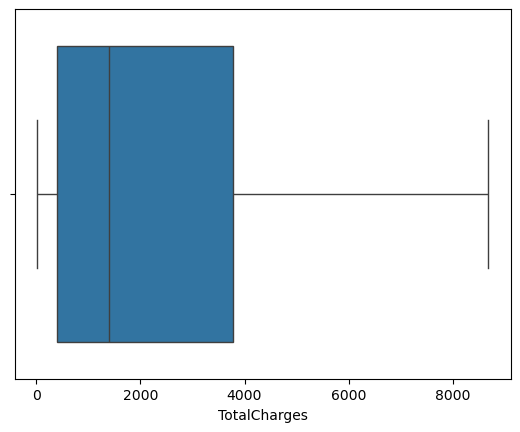

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['TotalCharges'])
plt.show()

In [ ]:
#feature engineering: AvgMonthlySpend and TenureGroup

In [33]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1) 

In [34]:
df[['AvgMonthlySpend']]

,AvgMonthlySpend
0,14.925000
1,53.985714
2,36.050000
3,40.016304
4,50.550000
...,...
7038,79.620000
7039,100.861644
7040,28.870833
7041,61.320000


In [35]:
def tenure_group(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 24:
        return '1-2 yrs'
    elif tenure <= 48:
        return '2-4 yrs'
    else:
        return 'Loyal'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [36]:
df[['TenureGroup']]

,TenureGroup
0,New
1,2-4 yrs
2,New
3,2-4 yrs
4,New
...,...
7038,1-2 yrs
7039,Loyal
7040,New
7041,New


In [37]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [38]:
print(df['Churn'].dtype) 

int64


In [ ]:
#data encoding

In [39]:
model_features = [
    # Demographics
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',

    # Account Info
    'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',

    # Services
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',

    # Charges
    'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend',

    # Engineered
    'TenureGroup'
]

In [40]:
from sklearn.preprocessing import LabelEncoder
df_model = df[model_features + ['Churn']].copy()
label_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [41]:
df_model = pd.get_dummies(df_model, columns=['gender', 'Contract', 'PaymentMethod', 'InternetService', 'TenureGroup'], drop_first=True)

In [42]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int32  
 2   Dependents                             7043 non-null   int32  
 3   tenure                                 7043 non-null   int64  
 4   PaperlessBilling                       7043 non-null   int32  
 5   PhoneService                           7043 non-null   int32  
 6   MultipleLines                          7043 non-null   int32  
 7   OnlineSecurity                         7043 non-null   int32  
 8   OnlineBackup                           7043 non-null   int32  
 9   DeviceProtection                       7043 non-null   int32  
 10  TechSupport                            7043 non-null   int32  
 11  Stre

In [ ]:
#scaling data: To standardize or normalise numeric feature.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [44]:
from sklearn.model_selection import train_test_split
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Logistic Regression</h1>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%')
print('\nLogistic Regression Classification Report:\n', classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 81.05%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



<h2>K-Nearest Neighbors (KNN)</h2>

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f'K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%')
print('\nKNN Classification Report:\n', classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 77.79%

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



<h3> Decision Tree</h3>

In [47]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

print(f'Decision Tree Accuracy: {decision_tree_accuracy * 100:.2f}%')
print('\nDecision Tree Classification Report:\n', classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy: 73.31%

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.50      0.47      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



<h4>Support Vector Machine (SVM)</h4>

In [48]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f'Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%')
print('\nSVM Classification Report:\n', classification_report(y_test, svm_pred,zero_division=0))

Support Vector Machine Accuracy: 73.53%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



 <h4>Model Accuracy Comparison</h4>

In [49]:
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support Vector Machine': svm_accuracy
}

for model, acc in model_accuracies.items():
    print(f'{model} Accuracy: {acc * 100:.2f}%')

Logistic Regression Accuracy: 81.05%
K-Nearest Neighbors Accuracy: 77.79%
Decision Tree Accuracy: 73.31%
Support Vector Machine Accuracy: 73.53%


We trained and evaluated multiple models to predict customer churn. Logistic Regression gave the highest accuracy (81.05%) and interpretable results. Based on model outputs, we identified key churn indicators and proposed actionable business strategies. The model is now ready to make predictions on new customer data, helping the company reduce churn and improve retention.

<h5>Model Interpretation and Findings</h5>

In [50]:
import pandas as pd

# Get coefficients from Logistic Regression
coefs = pd.Series(logreg.coef_[0], index=X_train.columns)

# Sort to find strongest predictors
print("Features increasing churn:")
print(coefs.sort_values(ascending=False).head(5))

print("Features reducing churn:")
print(coefs.sort_values(ascending=True).head(5))

Features increasing churn:
InternetService_Fiber optic       0.706834
TenureGroup_Loyal                 0.476856
PaperlessBilling                  0.348267
PaymentMethod_Electronic check    0.266737
TenureGroup_2-4 yrs               0.230706
dtype: float64
Features reducing churn:
Contract_Two year    -1.579196
Contract_One year    -0.683053
PhoneService         -0.569300
InternetService_No   -0.305062
OnlineSecurity       -0.200802
dtype: float64


The Logistic Regression model revealed several key features influencing churn. Customers using fiber optic internet, electronic check payments, or having paperless billing were more likely to churn. Interestingly, even mid-to-long-term customers (like those in the 2–4 year group or “loyal” group) showed elevated churn risks, possibly reflecting dissatisfaction over time. On the other hand, customers with long-term contracts (1 or 2 years), phone service, or online security features were significantly less likely to churn. These findings offer actionable business strategies for targeting high-risk users and strengthening retention.

In [ ]:
#Get the predictions for the new data.

In [57]:
def predict_churn():
    print(" Enter minimal customer details to predict churn:")

    # Collect only the top features manually
    manual_input = {
        'InternetService_Fiber optic': int(input("Uses Fiber Optic Internet? (1 = Yes, 0 = No): ")),
        'TenureGroup_Loyal': int(input("Is a Loyal Customer? (1 = Yes, 0 = No): ")),
        'PaperlessBilling': int(input("Uses Paperless Billing? (1 = Yes, 0 = No): ")),
        'PaymentMethod_Electronic check': int(input("Pays via Electronic Check? (1 = Yes, 0 = No): ")),
        'Contract_Two year': int(input("Contract Type is Two Year? (1 = Yes, 0 = No): ")),
        'Contract_One year': int(input("Contract Type is One Year? (1 = Yes, 0 = No): ")),
        'OnlineSecurity': int(input("Has Online Security? (1 = Yes, 0 = No): ")),
        'PhoneService': int(input("Has Phone Service? (1 = Yes, 0 = No): ")),
        'MonthlyCharges': float(input("Monthly Charges (e.g., 70.50): "))
    }

    # Start with all zero features, in exact order as X_train
    input_data = {col: 0 for col in X_train.columns}

    # Fill the user-provided inputs
    for key in manual_input:
        input_data[key] = manual_input[key]

    # Build input DataFrame in the same column order
    import pandas as pd
    input_df = pd.DataFrame([input_data])[X_train.columns]

    # Predict
    churn_prob = logreg.predict_proba(input_df)[:, 1][0]
    churn_pred = logreg.predict(input_df)[0]

    # Output
    print("\n🧾 Prediction Result:")
    print(f"Churn Probability: {churn_prob:.2f}")
    print("Churn Prediction:", "Yes " if churn_pred == 1 else "No ")

In [58]:
predict_churn()

 Enter minimal customer details to predict churn:


Uses Fiber Optic Internet? (1 = Yes, 0 = No):  0
Is a Loyal Customer? (1 = Yes, 0 = No):  1
Uses Paperless Billing? (1 = Yes, 0 = No):  0
Pays via Electronic Check? (1 = Yes, 0 = No):  1
Contract Type is Two Year? (1 = Yes, 0 = No):  0
Contract Type is One Year? (1 = Yes, 0 = No):  1
Has Online Security? (1 = Yes, 0 = No):  0
Has Phone Service? (1 = Yes, 0 = No):  0
Monthly Charges (e.g., 70.50):  50



🧾 Prediction Result:
Churn Probability: 0.78
Churn Prediction: Yes 
